In [26]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
sns.set()




def f(x):
    r1 = lambda x: np.sin((5*x**2 + x - 4)/5)
    return -math.tan(((3*x**5)-14*x+3**(1/3)-16)/20)-math.sin(1/(2*x*x+x+math.sqrt(5)))



#f = lambda x: 1/(math.cos((3*x**5-10*x+(10)**(1/3)-2-10*math.sqrt(2))/10)+math.atan((10*x**5-10*math.sqrt(5)*x**4+10*x**4)+3*x**2-3*math.sqrt(5)*x+1)/(2*x**2-2*math.sqrt(5)*x+2));

eps=0.001
delta=0.1*eps

# Дихотомия

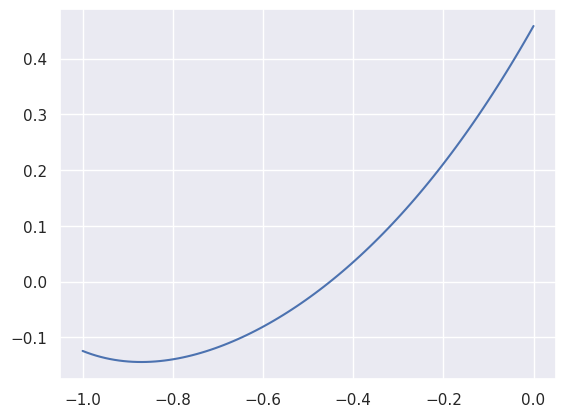

In [27]:
space = np.linspace(-1,0,100)
f_space = list(map(f,space))
plt.plot(space,f_space)

In [28]:
def find_min(a1,b1,f):
    iters=0
    l_theor=[b1-a1]
    l_real=[b1-a1]
    a=a1
    b=b1
    while abs(a-b)>=eps:
        iters+=1
        x=(a+b)/2
        k1=f(x-delta)
        k2=f(x+delta)
        
        if k1<k2:
            b=x
        else:
            a=x
        l_real.append(b-a)
        l_theor.append((l_theor[0]-2*delta)/2**(iters)+2*delta)
    return x,iters,l_real,l_theor

In [29]:
x_min,iters_count,l_real,l_theor=find_min(-1,0,f)

In [30]:
print(f'{x_min=},  {iters_count=},  f_count={iters_count*2}')

x_min=-0.8701171875,  iters_count=10,  f_count=20


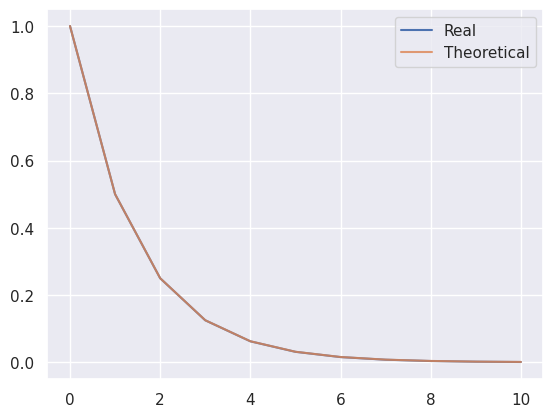

In [31]:
space=list(range(iters_count+1))
plt.plot(space,l_real,label='Real')
plt.plot(space,l_theor,label='Theoretical',alpha=0.8)
plt.legend()
plt.show()

In [32]:
l_real

[1,
 0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625]

In [33]:
l_theor

[1,
 0.5001,
 0.25015,
 0.125175,
 0.06268750000000001,
 0.03144375,
 0.015821875,
 0.0080109375,
 0.00410546875,
 0.002152734375,
 0.0011763671875000001]

# Золотое сечение

In [34]:
def golden_ratio_min(func, a1, b1,eps=eps):
    l_real = np.array([b1 - a1])
    l_theor = np.array([b1-a1])
    number_of_iterations = 0
    function_eval_counter = 2
    x1 = a1 + 2./(3. + np.sqrt(5.))*(b1 - a1)
    x2 = a1 + 2./(1. + np.sqrt(5.))*(b1 - a1)
    l1 = func(x1)
    l2 = func(x2)
    while b1 - a1 >= eps:
        number_of_iterations += 1
        function_eval_counter += 1
        if l1 <= l2:
            b1 = x2
            x2 = x1
            x1 = b1 + a1 - x2
            l2 = l1
            l1 = func(x1)
        else:
            a1 = x1
            x1 = x2
            x2 = b1 + a1 - x1
            l1 = l2
            l2 = func(x2)
        l_real = np.append(l_real,b1 - a1)
        gr=(1+np.sqrt(5))/2
        l_theor = np.append(l_theor,l_theor[-1]/(gr))
    return (b1 + a1) / 2, l_real,l_theor, number_of_iterations, function_eval_counter

In [35]:
x_min,l_real,l_theor,iters_count, function_count = golden_ratio_min(f,-1,0)

In [36]:
print(f'{x_min=},  {iters_count=},  f_count={function_count}')

x_min=-0.8699966350433002,  iters_count=15,  f_count=17


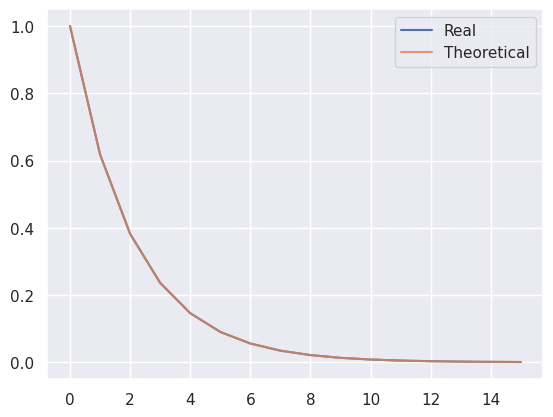

In [37]:
space=list(range(iters_count+1))
plt.plot(space,l_real,label='Real')
plt.plot(space,l_theor,label='Theoretical',alpha=0.8)
plt.legend()
plt.show()